### Red neuronal para predecir el ganador de un duelo en el juego League ogf Legends

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
data = pd.read_csv("games.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

In [3]:
data.head(30)

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
0,1949,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1,1
1,1851,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0,1
2,1493,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0,1
3,1758,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0,1
4,2094,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0,1
5,2059,2,2,1,1,2,0,8,1,1,1,0,6,0,0,3,0,1
6,1993,1,2,1,1,1,1,10,2,1,2,1,2,0,0,0,0,1
7,1334,1,1,0,0,2,1,6,0,0,0,1,0,0,0,2,0,1
8,1387,2,2,2,0,2,2,0,0,0,0,0,8,1,0,2,1,2
9,2681,2,2,2,2,2,0,10,1,0,2,0,8,3,1,2,0,2


# Se hace una descripción estadistica

In [4]:
data.describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# Se separan los datos (80% de entrenamiento y 20% de prueba)

In [5]:
from sklearn.model_selection import train_test_split 
N=len(data)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(data, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [6]:
train_data.shape

(40228, 18)

In [7]:
train_data.head(20)

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
32256,1430,1,1,1,1,1,1,11,2,1,2,1,0,0,0,0,0,1
47423,1330,1,2,2,2,1,0,0,0,0,1,0,10,2,1,1,0,2
35383,1882,1,1,1,0,1,2,10,2,0,3,0,2,0,0,0,1,1
43658,1930,2,2,2,2,2,1,2,0,0,0,1,11,3,1,2,0,2
40247,1877,2,2,1,1,1,1,10,2,2,3,1,4,0,0,0,0,1
32095,2109,1,1,1,1,2,1,11,3,1,4,1,2,0,0,1,0,1
38902,2122,1,1,1,1,2,0,7,1,1,1,0,4,0,0,3,0,1
32992,2507,1,2,2,2,2,0,8,1,1,0,0,7,1,1,5,0,1
30228,1222,1,2,2,0,1,2,1,0,0,1,0,6,1,0,1,1,2
21955,2316,2,2,1,2,2,0,10,2,0,1,0,4,0,1,3,0,1


# Se normalizan los datos por medio de un Pipeline para todos los atributos, teniendo en cuenta que todos son de tipo entero

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attribs = ['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])

In [9]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

In [10]:
X_train = full_pipeline.fit_transform(train_data)

X_train[0,:]

array([-0.97556147, -0.97423069, -0.96626545, -0.51806939,  0.0636629 ,
       -0.90199839,  0.30422343,  1.37845138,  0.75256386,  1.05055429,
        0.48637231,  1.69222306, -1.48791693, -0.79692861, -0.68511117,
       -1.1770884 , -0.5701166 ])

# Se estrae las etiquetas de clase

In [11]:
y_train = train_data['winner']
y_train

32256    1
47423    2
35383    1
43658    2
40247    1
        ..
16382    2
6002     1
49380    1
6474     2
20259    2
Name: winner, Length: 40228, dtype: int64

# Se crean las redes neuronales

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo1 = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(40, 50), random_state=123)
modelo1.fit(X_train, y_train)
scores1 = cross_val_score(modelo1, X_train, y_train, cv=5, scoring='accuracy')
print(scores1)
scores1.mean()

/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to conv

[0.97663435 0.97899577 0.97651007 0.97638285 0.97476694]


/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9766579952717492

In [13]:
modelo2 = MLPClassifier(activation='identity',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(16,4), random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='accuracy')
print(scores2)
scores2.mean()

[0.97066866 0.97402436 0.97390007 0.97526414 0.97190802]


0.9731530492706094

In [14]:
modelo3 = MLPClassifier(activation='logistic',solver='sgd', alpha=1e-5,hidden_layer_sizes=(23,7), random_state=123)
modelo3.fit(X_train, y_train)
scores3 = cross_val_score(modelo3, X_train, y_train, cv=5, scoring='accuracy')
print(scores3)
scores3.mean()

/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.97091723 0.97551578 0.97340293 0.97613424 0.97190802]


/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9735756411201162

In [15]:
modelo4 = MLPClassifier(activation='tanh',solver='sgd', alpha=1e-5,hidden_layer_sizes=(50,), random_state=123)
modelo4.fit(X_train, y_train)
scores4 = cross_val_score(modelo4, X_train, y_train, cv=5, scoring='accuracy')
print(scores4)
scores4.mean()

[0.97253294 0.97825006 0.97514293 0.97712865 0.97414543]


0.9754400018414936

In [16]:
modelo5 = MLPClassifier(activation='relu',solver='adam', alpha=1e-5,hidden_layer_sizes=(12,23), random_state=123)
modelo5.fit(X_train, y_train)
scores5 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores5)
scores5.mean()

[0.97588864 0.98222719 0.97936863 0.98234929 0.98085768]


0.9801382850350695

In [17]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-0.7957942 ,  1.02645093,  1.03265085, ...,  0.94050238,
         1.28015566,  1.75402716],
       [ 0.06753258, -0.97423069,  1.03265085, ..., -0.68511117,
        -1.1770884 ,  1.75402716],
       [ 1.09287184, -0.97423069, -0.96626545, ...,  2.56611592,
         0.46107431, -0.5701166 ],
       ...,
       [ 0.00982951,  1.02645093, -0.96626545, ..., -0.68511117,
        -1.1770884 , -0.5701166 ],
       [-0.79801355, -0.97423069, -0.96626545, ..., -0.68511117,
        -0.35800705, -0.5701166 ],
       [-0.74474917, -0.97423069,  1.03265085, ..., -0.68511117,
        -1.1770884 , -0.5701166 ]])

In [61]:
y_pred1 = modelo1.predict(X_test)  
y_pred2 = modelo2.predict(X_test)  
y_pred3 = modelo3.predict(X_test) 
y_pred4 = modelo4.predict(X_test)
y_pred5 = modelo5.predict(X_test)  

In [45]:
y_test = test_data["winner"]

10058


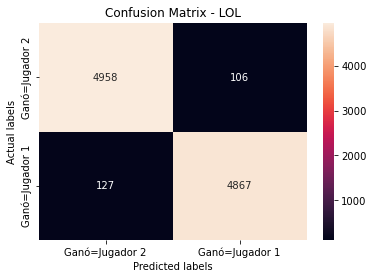

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

modelos = []
ax = plt.subplot()


modelos.append(["Modelo 1", accuracy_score(y_test, y_pred1)])
confusion_matrix1 = confusion_matrix(y_test, y_pred1)

# Matriz de confusión
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


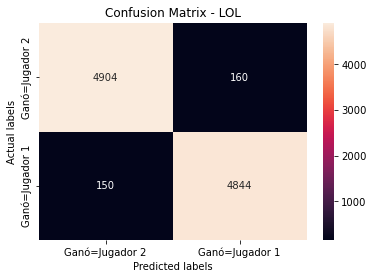

In [67]:
ax = plt.subplot()

modelos.append(["Modelo 2", accuracy_score(y_test, y_pred2)])
confusion_matrix2 = confusion_matrix(y_test, y_pred2)

# Matriz de confusión
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


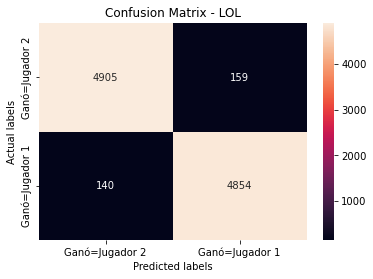

In [69]:
ax = plt.subplot()

modelos.append(["Modelo 3", accuracy_score(y_test, y_pred3)])
confusion_matrix3 = confusion_matrix(y_test, y_pred3)

# Matriz de confusión
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


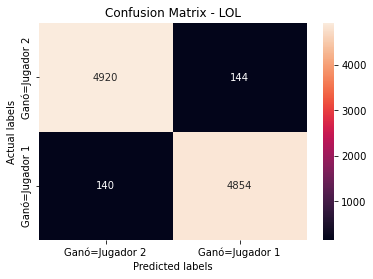

In [70]:
ax = plt.subplot()

modelos.append(["Modelo 4", accuracy_score(y_test, y_pred4)])
confusion_matrix4 = confusion_matrix(y_test, y_pred4)

# Matriz de confusión
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


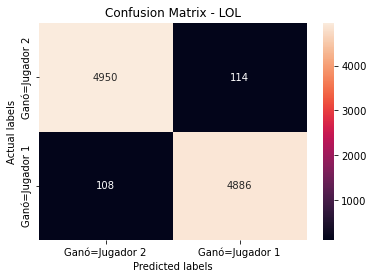

In [71]:
ax = plt.subplot()

modelos.append(["Modelo 5", accuracy_score(y_test, y_pred5)])
confusion_matrix5 = confusion_matrix(y_test, y_pred5)

# Matriz de confusión
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()

In [65]:
tabla_precision=pd.DataFrame(modelos, columns=["Modelo", "Precisión"])
tabla_precision

,Modelo,Precisión
0,Modelo 1,0.976834
1,Modelo 2,0.969179
2,Modelo 2,0.969179
3,Modelo 3,0.970272
4,Modelo 4,0.971764
5,Modelo 5,0.977928


## La mayor precisión es de 0.977928 y los hiperparametros que permiten obtener esta mayor precisión son:
### Función de activación: **relu**
### solver: **adam**, 
### hidden_layer_sizes=(12,23), 2 **capas ocultas** y 12 y 23 **neuronas** por cada una de las capas